# Problem3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1

In [2]:
#read data
X_test = pd.read_csv("hw1-data/X_test.csv",header = None)
X_train = pd.read_csv("hw1-data/X_train.csv",header = None)
y_test = pd.read_csv("hw1-data/y_test.csv",header = None)
y_train = pd.read_csv("hw1-data/y_train.csv",header = None)

In [3]:
#change to array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

(a)

In [4]:
#solve for W_RR
def solveRR(X,y,lams):
    """
    input: 
        X: numpy array of X_train
        y: numpy array of y_train
        lams: list of all the values of lambda
    output:
        W_RRs: len(lams)*X.shape[1] numpy array of W of ridge regression
        dfs: a list of degree of freedom under different lambda
    """
    W_RRs= []
    dfs= []
    for lam in lams:
        X_trans = np.transpose(X)
        X_trans_X = np.dot(X_trans,X)
        I = np.identity(X_trans_X.shape[0])
        W_rr = np.dot(np.linalg.inv(lam*I+X_trans_X),np.dot(X_trans,y))
        W_RRs.append(W_rr)
        U,S,V = np.linalg.svd(X)
        df = np.sum(np.square(S)/(np.square(S)+lam))
        dfs.append(df)
    W_RRs = np.array(W_RRs).reshape(len(lams),X.shape[1])
    return W_RRs, dfs

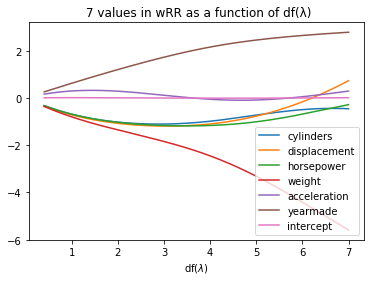

In [5]:
lams = list(range(0,5001))
W_RRs, dfs = solveRR(X_train,y_train,lams)
dfs = np.asarray(dfs)
data = pd.DataFrame(W_RRs, index = dfs, columns = ['cylinders','displacement','horsepower','weight','acceleration','yearmade','intercept'])
data.plot(kind = "line")
_ = plt.xlabel('df('+r'$\lambda$'+')')
_ = plt.title(" 7 values in wRR as a function of df(λ)")


(b)

The dimension "yearmade" and "weight" clearly stand out over others.      
From this plot, the absolute value of wRR of "yearmade" and "weight" are much higher compared to other features; It indicates that they contribute most to y and have a greater influence on the miles per gallon a car will get. And when "yearmade" increases, the miles per gallon a car will get increases; While when "weight" increases, the miles per gallon a car will get decreases.

(c)

In [6]:
#predict with RR
lams = list(range(0,51))
W_RRs, dfs = solveRR(X_train,y_train,lams)
def predictRR(X_test,W_RRs,lams):
    y_predicts = []
    for i in range(0,len(lams)):
        y_predict = np.dot(X_test,W_RRs[i,:])
        y_predicts.append(y_predict)
    return y_predicts

y_predicts = predictRR(X_test, W_RRs,lams)

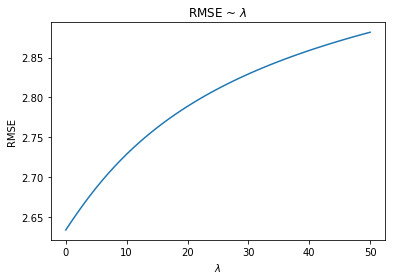

In [7]:
#draw RMSE plot
def RMSE(y_test, y_predicts):
    RMSEs = []
    for i in range(0,len(y_predicts)):
        RMSE = np.sqrt(np.mean(np.square(y_test-np.asarray(y_predicts[i].reshape(y_test.shape[0],1))),axis = 0))
        RMSEs.append(RMSE)
    return RMSEs
RMSEs = RMSE(y_test, y_predicts)
plt.figure()
plt.ylabel('RMSE')
plt.xlabel(r'$\lambda$')
plt.title("RMSE ~ $\lambda$")
plt.plot(lams,RMSEs)

This figure shows that RMSE increases with the increase of $\lambda$.      
Thus, to minimize RMSE, $\lambda$ should be as small as possible, that is, 0. So we should choose least squares regression. It indicates that when we choose p=1, the regression won't lead an overfitting; therefore, we do not need to add penalty. Actually, adding penalty may cause underfitting and will lead a worse prediction.

## Part 2

(d)

In [8]:
#polynomial regression
#create new X_train and X_test
def poly_X(X,p):
    """
    input: 
        X: numpy array shape[1]=dimension+1 and 1 is the last column
        p: int order 
    output:
        X_new: numpy array shape[1]=dimension*order+1 and with 1 is the last column,
               and has been standardized
        (in this output, only consider Xi^p, no cross term XiXj)
    """
    X_new = X[:,:-1]
    for i in range(2,p+1):
        X_new = np.concatenate((X_new,np.power(X[:,:-1],i)),axis = 1)  
    X_new = np.concatenate((X_new,np.ones(X.shape[0]).reshape(X.shape[0],1)),axis = 1)
    return X_new

In [9]:
#p = 1
lams = list(range(0,101))
W_RRs, dfs = solveRR(X_train,y_train,lams)
y_predicts = predictRR(X_test, W_RRs,lams)
RMSEs_1 = RMSE(y_test, y_predicts)

In [17]:
#p = 2
lams = list(range(0,101))
X_train_2 = poly_X(X_train, 2)
X_test_2 = poly_X(X_test, 2)
X_train_2_scaled = np.copy(X_train_2)
X_test_2_scaled = np.copy(X_test_2)
for i in range(6,12):
    X_train_2_scaled[:,i] = (X_train_2[:,i]-np.mean(X_train_2[:,i]))/np.std(X_train_2[:,i])  
for i in range(6,12):
    X_test_2_scaled[:,i] = (X_test_2[:,i]-np.mean(X_train_2[:,i]))/np.std(X_train_2[:,i])
W_RRs, dfs = solveRR(X_train_2_scaled,y_train,lams)
y_predicts = predictRR(X_test_2_scaled, W_RRs,lams)
RMSEs_2 = RMSE(y_test, y_predicts)

In [20]:
#p = 3
X_train_3 = poly_X(X_train, 3)
X_test_3 = poly_X(X_test, 3)
X_train_3_scaled = np.copy(X_train_3)
X_test_3_scaled = np.copy(X_test_3)
for i in range(6,18):
    X_train_3_scaled[:,i] = (X_train_3[:,i]-np.mean(X_train_3[:,i]))/np.std(X_train_3[:,i])
for i in range(6,18):
    X_test_3_scaled[:,i] = (X_test_3[:,i]-np.mean(X_train_3[:,i]))/np.std(X_train_3[:,i])
W_RRs, dfs = solveRR(X_train_3_scaled,y_train,lams)
y_predicts = predictRR(X_test_3_scaled, W_RRs,lams)
RMSEs_3 = RMSE(y_test, y_predicts)

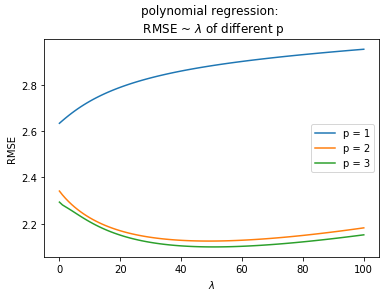

In [12]:
plt.figure()
plt.ylabel('RMSE')
plt.xlabel(r'$\lambda$')
plt.title("polynomial regression: \n RMSE ~ $\lambda$ of different p")
plt.plot(lams,RMSEs_1,label = "p = 1")
plt.plot(lams,RMSEs_2,label = "p = 2")
plt.plot(lams,RMSEs_3,label = "p = 3")
plt.legend()

For which p to choose, I think it is based on the situation. p = 3 leads to the smallest RMSE; while RMSE of p = 2 is just a little higher than that of p = 3, and when p = 2 the model is more simpler. Thus, if we care more about the model accuracy and less about the fitting time, I will choose p = 3; However, if there are a lot of data, and we do not care about the little accuracy difference between p = 3 and p = 2, I will choose p = 2.

When p is large, it is more likely to cause overfitting, thus it is more necessary to add penalty and may lead to a larger $\lambda$. After adding polynomial features, $\lambda \approx$ 50 reaches the minimized RMSE; when p = 3,$\lambda \approx$ 45 reaches the minimized RMSE when p = 2; While for p = 1, it is better to set $\lambda$ = 0. 